### Анализ тональности текстов

### Загрузка данных и пакетов

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Corona_NLP_train.csv', encoding='latin-1')
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
print(df.shape)

(41157, 6)


### Вывод случайных значений и обзор датафрейма

In [4]:
df.sample(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
25569,29368,74320,"Ruby Red ??Land, USA",01-04-2020,@Dovewoman1 @KatiePhang @SenSherrodBrown @tedl...,Extremely Positive
41020,44819,89771,NaN,14-04-2020,"When at the grocery store, do the opposite of ...",Positive
25463,29262,74214,"New York, NY",31-03-2020,Consumer Confidence Declined Sharply in March ...,Positive
15654,19453,64405,"Texas, USA",22-03-2020,"Just some ideas, paÂ que sepan! ???\r\r\n#gat...",Neutral
11224,15023,59975,NaN,20-03-2020,Watch @TheRashamiDesai flex her bargaining ski...,Positive
13947,17746,62698,NaN,21-03-2020,Heroes! #Coronavirus: 'Overworked and abused' ...,Positive
6756,10555,55507,"Denton, England",19-03-2020,Please stop abusing checkout operators. They d...,Extremely Negative
16937,20736,65688,"?? SÃ¶??????? S???Ã¿, U? ??",23-03-2020,@LOCCITANE_UK Supermarket workers also deserve...,Extremely Positive
27942,31741,76693,"New Delhi, India",04-04-2020,With not a word on how the public particularly...,Extremely Negative
26870,30669,75621,jane furse,02-04-2020,@samkelemaseko @DlaminiDavid @NoncebaMhlauli S...,Positive


In [5]:
df.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df = df[['OriginalTweet', 'Sentiment']]
df.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


### Визуализация

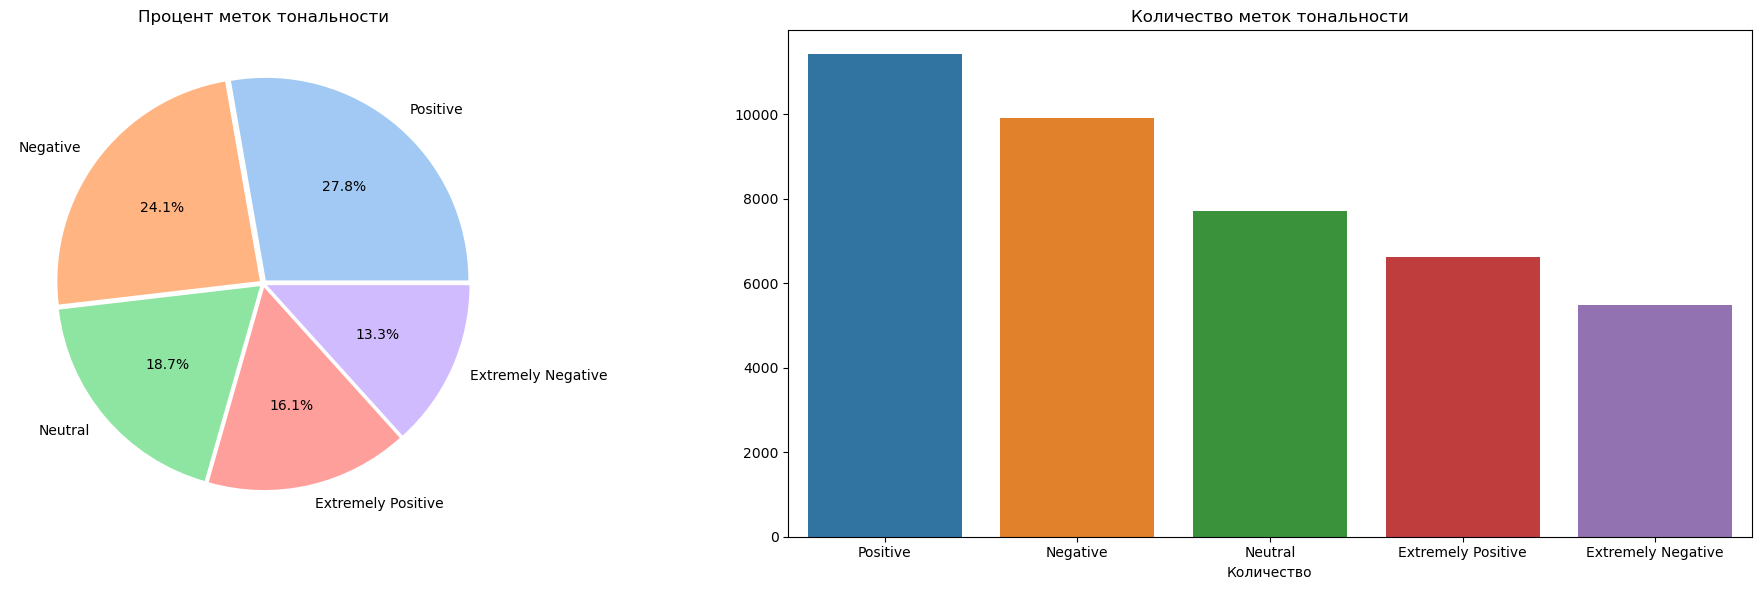

In [10]:
label_count = df['Sentiment'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
color = sns.color_palette(palette='pastel')
explode = [0.02]*len(label_count)

axes[0].pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors = color, explode=explode)
axes[0].set_title('Процент меток тональности')

sns.barplot(x=label_count.index, y=label_count.values, ax=axes[1])
axes[1].set_title('Количество меток тональности')
axes[1].set_xlabel('Метка')
axes[1].set_xlabel('Количество')

plt.tight_layout()
plt.show()

### Подсчет длины сообщений

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


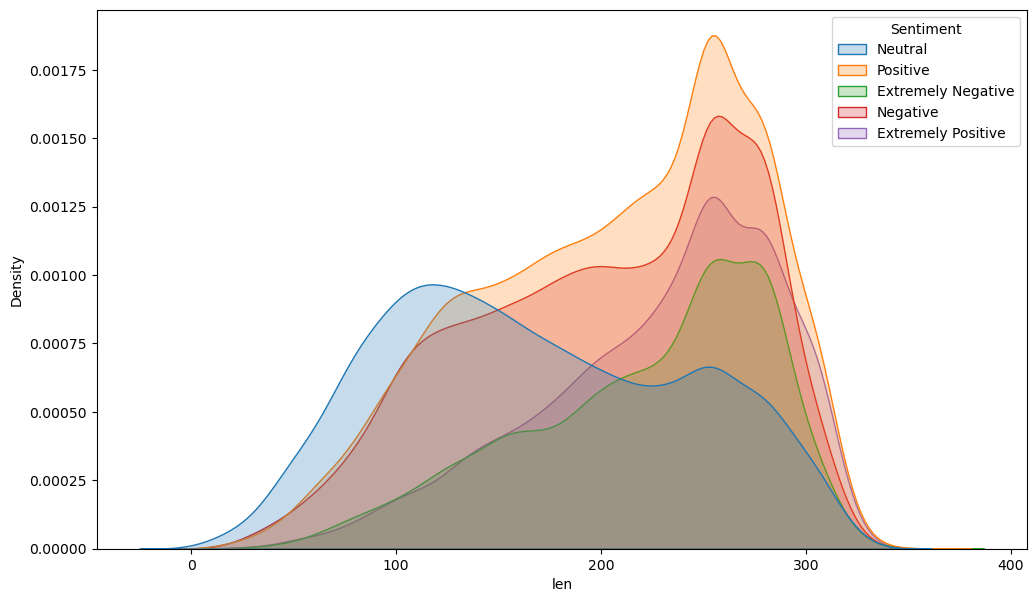

In [12]:
df['len'] = df['OriginalTweet'].apply(len)

plt.figure(figsize=(12,7))
sns.kdeplot(df, x=df['len'], fill=True, hue='Sentiment')
plt.show()